# Predicting Stock Price (Next Day)
#### 1 .Importing librarys

In [6]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import pandas_datareader as web
import datetime as dt

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout, LSTM

#### 2.Load data

In [16]:
# Tesla Tiker Symbol
company = 'TSLA' 

#set start date & end date
start = dt.datetime(2012,1,1)
end = dt.datetime(2021,4,1)

data = web.DataReader(company,'yahoo',start,end)
data.tail()


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-03-26,643.820007,599.890015,641.869995,618.710022,33778400.0,618.710022
2021-03-29,616.479980,596.020020,615.640015,611.289978,28637000.0,611.289978
2021-03-30,637.659973,591.010010,601.750000,635.619995,39432400.0,635.619995
2021-03-31,672.000000,641.109985,646.619995,667.929993,33337300.0,667.929993
2021-04-01,692.419983,659.419983,688.369995,661.750000,35298400.0,661.750000


#### 3.Prepare data

In [10]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1,1))

predict_day = 60
x_train = []
y_train = []

for x in range(predict_day,len(scaled_data)):
    x_train.append(scaled_data[x-predict_day:x,0])
    y_train.append(scaled_data[x,0])
    
x_train,y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1],1))


#### 4.Bulid Model

In [11]:
model = Sequential()

model.add(LSTM(units=50,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))

# Prediction of the next close price
model.add(Dense(units=1))

model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train,y_train, epochs=25, batch_size=32)



Epoch 1/25
71/71 [==============================] - 13s 74ms/step - loss: 0.0085
Epoch 2/25
71/71 [==============================] - 5s 76ms/step - loss: 9.8620e-04
Epoch 3/25
71/71 [==============================] - 5s 73ms/step - loss: 0.0014
Epoch 4/25
71/71 [==============================] - 5s 74ms/step - loss: 0.0011
Epoch 5/25
71/71 [==============================] - 5s 75ms/step - loss: 8.8009e-04
Epoch 6/25
71/71 [==============================] - 5s 74ms/step - loss: 9.2717e-04
Epoch 7/25
71/71 [==============================] - 5s 74ms/step - loss: 0.0014
Epoch 8/25
71/71 [==============================] - 6s 78ms/step - loss: 5.2220e-04
Epoch 9/25
71/71 [==============================] - 6s 78ms/step - loss: 8.6010e-04
Epoch 10/25
71/71 [==============================] - 6s 82ms/step - loss: 5.0460e-04
Epoch 11/25
71/71 [==============================] - 6s 82ms/step - loss: 5.7808e-04
Epoch 12/25
71/71 [==============================] - 6s 91ms/step - loss: 4.8115e-04
Epoc

#### 5.Test the model accurancy

In [12]:
test_start = dt.datetime(2021,4,1)
test_end = dt.datetime.now()

test_data = web.DataReader(company,'yahoo',test_start,test_end)
actual_prices = test_data['Close'].values

total_dataset = pd.concat((data['Close'],test_data['Close']),axis=0)

model_inputs = total_dataset[len(total_dataset) - len(test_data) - predict_day:].values
model_inputs = model_inputs.reshape(-1,1)
model_inputs = scaler.transform(model_inputs)


#### 6. Make Predictions on Test Data

In [13]:
x_test = []

for x in range(predict_day, len(model_inputs)):
       x_test.append(model_inputs[x-predict_day:x, 0])
        
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))


predicted_prices = model.predict(x_test)
predicted_prices = scaler.inverse_transform(predicted_prices)




#### 7.Plot the Test Predictions

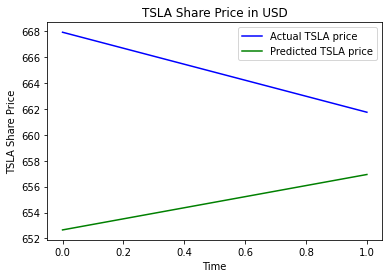

In [14]:
#plot the test predictions

plt.plot(actual_prices, color='blue',label= f"Actual {company} price" )
plt.plot(predicted_prices, color='green',label=f"Predicted {company} price")
plt.title(f"{company} Share Price in USD")
plt.xlabel('Time')
plt.ylabel(f'{company} Share Price')
plt.legend()
plt.show()

### Predict Next Day

In [15]:
real_data = [model_inputs[len(model_inputs) + 1 - predict_day:len(model_inputs+1), 0]]
real_data = np.array(real_data)
real_data = np.reshape(real_data,(real_data.shape[0],real_data.shape[1], 1))

#print(scaler.inverse_transform(real_data[]))

prediction = model.predict(real_data)
prediction = scaler.inverse_transform(prediction)

print(f"Tomorrow Prediction : {prediction}")


Tomorrow Prediction : [[662.834]]


## Next day Tesla stock price : 662.83